In [1]:
# define id (full id account) -> dem id
INSTANCE_ID = 'c9848c73-6982-4017-b14b-13eacc06c59e'  
# aldready inputted into config file. In case you put instance ID into cofniguration file you can leave this unchanged

In [2]:
# option settings
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import datetime
import warnings
from sentinelhub import WmsRequest, WcsRequest, MimeType, CRS, BBox, CustomUrlParam, DataSource

# warning settings

In [8]:
from sentinelhub import DataSource

for source in DataSource:
    print(source)

DataSource.SENTINEL2_L1C
DataSource.SENTINEL2_L2A
DataSource.SENTINEL1_IW
DataSource.SENTINEL1_EW
DataSource.SENTINEL1_EW_SH
DataSource.DEM
DataSource.MODIS
DataSource.LANDSAT8


In [6]:
### define functions

# function for plotting RGB images
def plot_image(data, factor=1):
    """
    Utility function for plotting RGB images. The numpy arrays returned by the WMS and WCS requests have channels
    ordered as Blue (`B02`), Green (`B03`), and Red (`B04`) therefore the order has to be reversed before ploting
    the image.
    """
    fig = plt.subplots(nrows=1, ncols=1, figsize=(16, 10))
    rgb = data.astype(np.float32)
    if len(rgb.shape) == 3 and rgb.shape[2] == 3:
        rgb = rgb[..., [2, 1, 0]]
    plt.imshow(rgb * factor)

### DEM

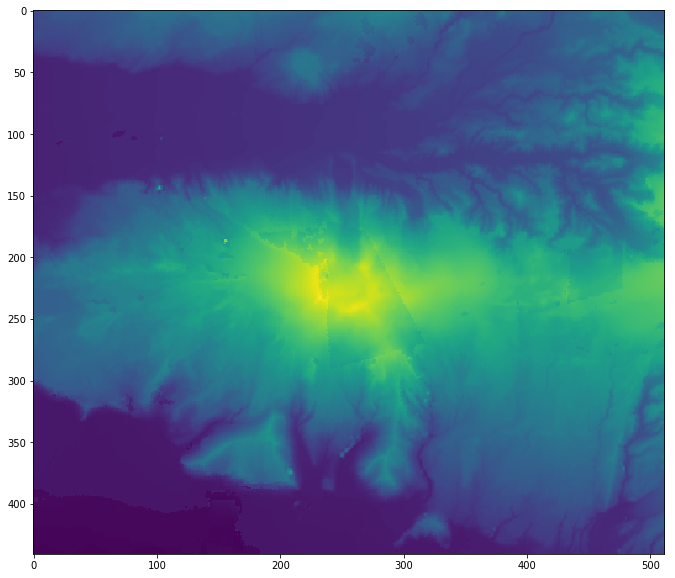

In [18]:
volcano_bbox = BBox(bbox=[(-2217485.0, 9228907.0), (-2150692.0, 9284045.0)], crs=CRS.POP_WEB)

dem_request = WmsRequest(data_source=DataSource.DEM,
                         layer='TRUE-COLOR-DEM',
                         bbox=volcano_bbox,
                         width=512,
                         instance_id='99adef48-e72e-419b-995a-0ec60dd913d8',
                         image_format=MimeType.TIFF_d32f,
                         custom_url_params={CustomUrlParam.SHOWLOGO: False})

dem_image = dem_request.get_data()[0]
plot_image(dem_image,  1./255)

### Sentinel 1

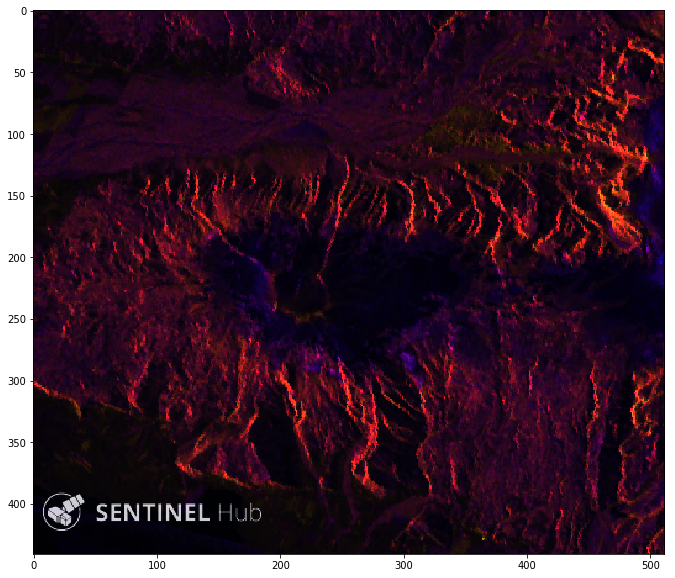

In [15]:
s1_request = WmsRequest(data_source=DataSource.SENTINEL1_IW,
                         layer='TRUE-COLOR-S1-IW',
                         bbox=volcano_bbox,
                         time='2017-10-03',
                         width=512,
                         instance_id='13c30a60-b0b5-47b0-a9bf-b97cda6039f4')

s1_data = s1_request.get_data()
plot_image(s1_data[-1],  1./255)

In [122]:
# define coordinate of chosen point
# always specify -> BBox([lng_1, lat_1, lng_2, lat_2]
via_santo_domingo_wgs84 = [-79.10, -0.30, -79.20, -0.40]
# betsiboka_coords_wgs84 = [46.16, -16.15, 46.51, -15.58]

# define bounding box
via_santo_domingo_bbox = BBox(bbox=via_santo_domingo_wgs84, crs=CRS.WGS84)
# betsiboka_bbox = BBox(bbox=betsiboka_coords_wgs84, crs=CRS.WGS84)

/anaconda/lib/python3.6/site-packages/sentinelhub/common.py:56: UserWarning: Since sentinelhub version 2.0.0 the order of coordinates for BBox in CRS.WGS84 has been reversed from latitide-longitude to longitude-latitude. Please make sure to initialize bounding box with BBox([lng_1, lat_1, lng_2, lat_2], CRS.WGS84). The order of coordinates in other coordinate reference systems has not changed.
  warnings.warn(message)


In [129]:
# define options for image request  
wms_true_color_request = WmsRequest(layer='TRUE_COLOR',
                                    # bbox=betsiboka_bbox,
                                    bbox=via_santo_domingo_bbox,
                                    time='latest',
                                    # time=('2018-01-01', '2018-04-30'), 
                                    maxcc=0.2, 
                                    width=512, height=856,
                                    instance_id=INSTANCE_ID)

# pull request
wms_true_color_img = wms_true_color_request.get_data()